#  XOR - Neural Network 
* XOR 문제를  Neural Network을 활용해 풀어보도록 하겠습니다.

https://github.com/deeplearningzerotoall/TensorFlow/tree/master/tf_2.x

### 기본 Library 선언 및 Tensorflow 버전 확인

In [14]:
#기본 Library 선언 및 Tensorflow 버전 확인
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

2.0.0


### XOR  Data
* x_data가 2차원 배열이기에 2차원 공간에 표현하여 x1과 x2를 기준으로 y_data 0과 1로 구분하는 예제
* 붉은색원과 푸른색세모로 0과 1을 표시.

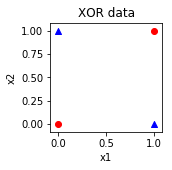

In [15]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.figure(figsize= (2,2))
plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='o')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='o')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title ("XOR data")
plt.show()

##  Tensorflow XOR 모델링

* Tensorflow data API를 통해 학습시킬 값들을 담는다 (Batch Size는 한번에 학습시킬 Size로 정한다)
* features,labels는 실재 학습에 쓰일 Data (연산을 위해 Type를 맞춰준다)

Neural Network를 통해 XOR해결 
* 위의 Data를 3Layer의 Neural Network를 통해 학습시킨 후 모델을 생성합니다.

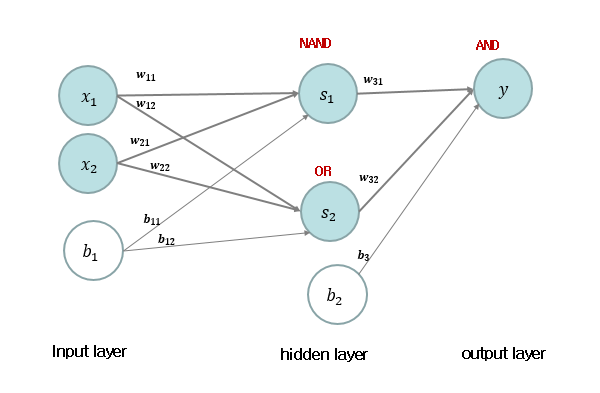

* cost (loss) function : cross_entropy_error

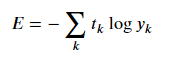


In [16]:
#Tensorflow data API로 데이터 설정
#tf.data.Dataset.from_tensor_slices() : x_data, y_data를 이용하여 텐서플로우 데이터집합 생성
#batch() 한번에 학습시킬 크기 

dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))  

#features, label 타입변경
def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

In [17]:
#3-Layer의 Neural Network 구조에 대한  weight, bias 초기값 설정
W1 = tf.Variable(tf.random.normal([2, 1]), name='weight1') #W1.shape (2,1)
b1 = tf.Variable(tf.random.normal([1]), name='bias1')

W2 = tf.Variable(tf.random.normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random.normal([1]), name='bias2')

W3 = tf.Variable(tf.random.normal([2, 1]), name='weight3')
b3 = tf.Variable(tf.random.normal([1]), name='bias3')

In [18]:
#3-layer Neural Network 구조에 대한  출력(hypothesis)
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)  #hidden node1 값
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)  #hidden node2값
    layer3 = tf.concat([layer1, layer2],-1)            #hidden node1과 2를 결합
    layer3 = tf.reshape(layer3, shape = [-1,2])        #열이 2개인 배열로 구조변경
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3) #출력노드의 입력으로 layer3를 이용하여 최종 가설(예측함수)을 계산  
    return hypothesis

#cost(loss) function (cross_entropy_error)
def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

#optimization (Gradient decent algorithm)
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)

# 예측결과와 출력 결과가 같은것의 평균으로 정확도 계산 
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

#기울기 계산
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])

In [22]:
#반복횟수 설정
EPOCHS = 50000

train_loss_list = []
for step in range(EPOCHS):
    for features, labels  in iter(dataset):  
        features, labels = preprocess_data(features, labels) #타입변경
        grads = grad(neural_net(features), features, labels) #기울기 계산
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, b1, b2, b3])) #기울기와 계수를 최적화 알고리즘에 적용
        loss = loss_fn(neural_net(features),labels) # 손실함수
        train_loss_list.append(loss)                # 학습 과정 기록
        if step % 5000 == 0:                        # 500번에 한번씩 
            print("Iter: {}, Loss: {:.4f}".format(step, loss))

x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6381
Iter: 5000, Loss: 0.5901
Iter: 10000, Loss: 0.5479
Iter: 15000, Loss: 0.4906
Iter: 20000, Loss: 0.3686
Iter: 25000, Loss: 0.2356
Iter: 30000, Loss: 0.1590
Iter: 35000, Loss: 0.1168
Iter: 40000, Loss: 0.0912
Iter: 45000, Loss: 0.0743
Testset Accuracy: 1.0000


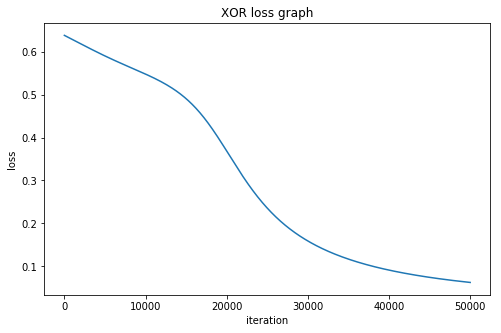

In [25]:
# 그래프 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
markers = {'train': 'o', 'test': 's'}

x_loss = np.arange(len(train_loss_list))
plt.plot(x_loss, train_loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("XOR loss graph")
plt.show()